In [1]:
import pandas as pd
import csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
def remove_umlaut(s):
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()
    
    s = s.encode()
    s = s.replace(u,b'ue')
    s = s.replace(U, b'Ue')
    s = s.replace(a, b'ae')
    s = s.replace(A, b'Ae')
    s = s.replace(o, b'oe')
    s = s.replace(O, b'Oe')
    s = s.replace(ss, b'ss')

    s = s.decode('utf-8')
    return s  

In [18]:
company_gleif = []
with open("../../DataSets/20210311-0800-gleif-goldencopy-lei2-golden-copy.csv", "r",encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=",")#check the structure of the file
    count = 0
    for i,line in enumerate(reader):
        print(line)
        print(line.index("Entity.EntityCategory"))
        break
len()

['LEI', 'Entity.LegalName', 'Entity.LegalName.xmllang', 'Entity.OtherEntityNames.OtherEntityName.1', 'Entity.OtherEntityNames.OtherEntityName.1.xmllang', 'Entity.OtherEntityNames.OtherEntityName.1.type', 'Entity.OtherEntityNames.OtherEntityName.2', 'Entity.OtherEntityNames.OtherEntityName.2.xmllang', 'Entity.OtherEntityNames.OtherEntityName.2.type', 'Entity.OtherEntityNames.OtherEntityName.3', 'Entity.OtherEntityNames.OtherEntityName.3.xmllang', 'Entity.OtherEntityNames.OtherEntityName.3.type', 'Entity.OtherEntityNames.OtherEntityName.4', 'Entity.OtherEntityNames.OtherEntityName.4.xmllang', 'Entity.OtherEntityNames.OtherEntityName.4.type', 'Entity.OtherEntityNames.OtherEntityName.5', 'Entity.OtherEntityNames.OtherEntityName.5.xmllang', 'Entity.OtherEntityNames.OtherEntityName.5.type', 'Entity.TransliteratedOtherEntityNames.TransliteratedOtherEntityName.1', 'Entity.TransliteratedOtherEntityNames.TransliteratedOtherEntityName.1.xmllang', 'Entity.TransliteratedOtherEntityNames.Translitera

In [26]:
company_gleif = []
with open("../../DataSets/20210311-0800-gleif-goldencopy-lei2-golden-copy.csv", "r",encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=",")#check the structure of the file
    for i, line in enumerate(reader):
        row_company = {}
        for n in range(len(line)):
            if line[n] != "":
                row_company[str(n)]=line[n]
            else:
                continue
        company_gleif.append(row_company)
company_gleif[0:10]

[{'0': 'LEI',
  '1': 'Entity.LegalName',
  '2': 'Entity.LegalName.xmllang',
  '3': 'Entity.OtherEntityNames.OtherEntityName.1',
  '4': 'Entity.OtherEntityNames.OtherEntityName.1.xmllang',
  '5': 'Entity.OtherEntityNames.OtherEntityName.1.type',
  '6': 'Entity.OtherEntityNames.OtherEntityName.2',
  '7': 'Entity.OtherEntityNames.OtherEntityName.2.xmllang',
  '8': 'Entity.OtherEntityNames.OtherEntityName.2.type',
  '9': 'Entity.OtherEntityNames.OtherEntityName.3',
  '10': 'Entity.OtherEntityNames.OtherEntityName.3.xmllang',
  '11': 'Entity.OtherEntityNames.OtherEntityName.3.type',
  '12': 'Entity.OtherEntityNames.OtherEntityName.4',
  '13': 'Entity.OtherEntityNames.OtherEntityName.4.xmllang',
  '14': 'Entity.OtherEntityNames.OtherEntityName.4.type',
  '15': 'Entity.OtherEntityNames.OtherEntityName.5',
  '16': 'Entity.OtherEntityNames.OtherEntityName.5.xmllang',
  '17': 'Entity.OtherEntityNames.OtherEntityName.5.type',
  '18': 'Entity.TransliteratedOtherEntityNames.TransliteratedOtherEntit

company_gleif = []
with open("../../DataSets/20210311-0800-gleif-goldencopy-lei2-golden-copy.csv", "r",encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=",")#check the structure of the file
    count = 0
    
    for i,line in enumerate(reader):
        row_company = {}
####################name         
        row_company["LEI"] = line[0]
        row_company["name"] = line[1]
        row_company["Entity.LegalName.xmllang"]=line[2]
        row_company["OtherEntityName"] = line[3]
####################address
        row_company["TransliteratedOtherEntityName"] = line[23]
        row_company["city"] = line[131]
        row_company["buildingNumber"] = line[126] 
        row_company["plz"] = line[134]
###################companyNumber
        row_company["mail"] = line[166]
####################companyYear
        row_company["expirationReason"] = line[200]
####################state
        row_company["Entity.LegalJurisdiction"] = line[190]
###################status
        row_company["EntityCategory"] = line[191]
        company_gleif.append(row_company)

In [4]:
import pandas as pd 
df = pd.json_normalize(company_gleif)
df

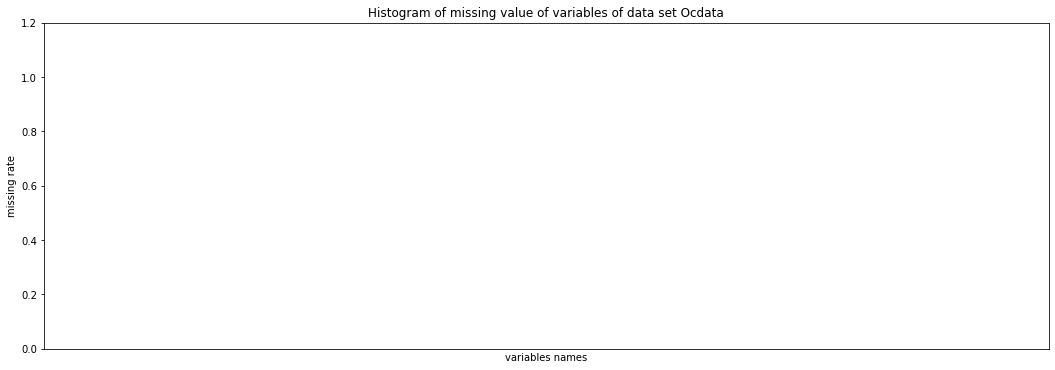

In [42]:
import pandas as pd
import numpy as np


missing=df.isnull().sum().reset_index().rename(columns={0:'missNum'})

missing['missRate']=missing['missNum']/df.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

import matplotlib.pyplot as plt
import pylab as pl

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center'
    ,color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables of data set Ocdata')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])
    
plt.show()

In [27]:
company_gleif
x = [i for i in company_gleif[0].keys()]



count_list = {}

for line in company_gleif:
    
    if line.get(list(line.keys())[0]) == "":
        count_LEI += 1
    if line.get(list(line.keys())[1]) == "":
        count_name +=1
    if line.get(list(line.keys())[2]) == "":
        count_LegalName +=1
    if line.get(list(line.keys())[3]) == "":
        count_OtherEntityName +=1
    if line.get(list(line.keys())[4]) == "":
        count_TransliteratedOtherEntityName+=1
    if line.get(list(line.keys())[5]) == "":
        count_city+=1
    if line.get(list(line.keys())[6]) == "":
        count_buildingNumber+=1
    if line.get(list(line.keys())[7]) == "":
        count_plz+=1
    if line.get(list(line.keys())[8]) == "":
        count_mail+=1
    if line.get(list(line.keys())[9]) == "":
        count_expirationReason+=1
    if line.get(list(line.keys())[10]) == "":
        count_LegalJurisdiction+=1
    if line.get(list(line.keys())[11]) == "":
        count_EntityCategory+=1
count_LegalJurisdiction     

0

{34: 2, 40: 2, 26: 1, 32: 1, 25: 4, 27: 3, 44: 2, 37: 4, 5: 1, 0: 2, 9: 2, 21: 4, 1: 3, 24: 1, 35: 2, 4: 2, 22: 3, 41: 2, 48: 1, 13: 2, 47: 2, 7: 4, 30: 2, 10: 2, 19: 3, 42: 3, 16: 2, 49: 6, 23: 2, 14: 4, 20: 1, 15: 3, 2: 2, 46: 1, 18: 2, 17: 1, 36: 2, 12: 1, 3: 2, 33: 2, 45: 2, 6: 2, 38: 1, 43: 3, 11: 1}
    0
34  2
40  2
26  1
32  1
25  4
27  3
44  2
37  4
5   1
0   2
9   2
21  4
1   3
24  1
35  2
4   2
22  3
41  2
48  1
13  2
47  2
7   4
30  2
10  2
19  3
42  3
16  2
49  6
23  2
14  4
20  1
15  3
2   2
46  1
18  2
17  1
36  2
12  1
3   2
33  2
45  2
6   2
38  1
43  3
11  1


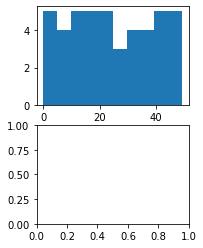

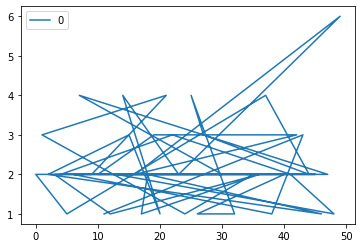

In [13]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import collections

array = []
for i in range(100):
    array.append(random.randint(0,50))
b = collections.Counter(array)
dic = {number: value for number,value in b.items()}
print(dic)
x = [i for i in dic.keys()]
y = []
for i in dic.keys():
    y.append(dic.get(i))
df = pd.DataFrame(y,x)
print(df)
plt.xlabel = "number"
plt.ylabel = "count"
plt.subplot(221)
plt.hist(x)
plt.subplot(223)
df.plot()
plt.show()